# <p style="text-align: center;">EE 379K: Data Science Lab</p>
# <p style="text-align: center;">Lab 4 - 10/2/17</p>
## <p style="text-align: center;">Rachel Chen and Kevin Yee</p>
### <p style="text-align: center;"> rjc2737 and kjy252</p>

# Problem 2: Low Rank Approximation of Mona Lisa
1. Load the Mona Lisa image (in grayscale) and treat it as a matrix M. Perform a singular value
decomposition on this matrix using linalg.svd. You can perform a low-rank approximation
by zeroing out singular values and keeping only the top k. Show the best rank k = 2, k = 5
and k = 10 approximation to Mona Lisa.


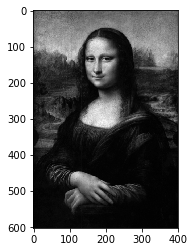

In [26]:
import scipy as sp
import matplotlib.pyplot as plt
from scipy.misc import imread
from scipy import linalg
import numpy as np
%matplotlib inline

monaLisa = imread("mona_lisa.png",flatten = True)
plt.imshow(monaLisa, cmap='gray')
plt.show()

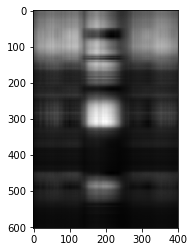

In [69]:
U, s, Vh = linalg.svd(monaLisa, full_matrices = False)
s.shape
scopy = np.copy(s)
scopy[:] = 0
scopy[:2] = np.copy(s[:2])
monaLisaDecomposed = np.dot(np.dot(U,np.diag(scopy)),Vh)
plt.imshow(monaLisaDecomposed, cmap='gray')

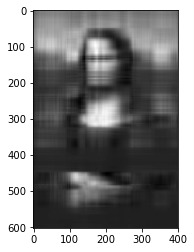

In [70]:
scopy[:5] = np.copy(s[:5])
monaLisaDecomposed = np.dot(np.dot(U,np.diag(scopy)),Vh)
plt.imshow(monaLisaDecomposed, cmap='gray')

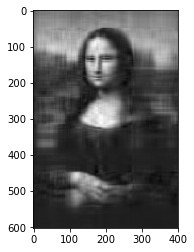

In [72]:
scopy[:10] = np.copy(s[:10])
monaLisaDecomposed = np.dot(np.dot(U,np.diag(scopy)),Vh)
plt.imshow(monaLisaDecomposed, cmap='gray')

# Problem 3: Using Low Rank Structure for Corrupted Entries
Download files CorrMat1.csv and CorrMat3.csv from Canvas. These are each 100 by 100 ma-
trices. Look at the data and find which entries are corrupted. Then try to correct these corrupted
entries. Explain your approach.

In [164]:
import numpy as np
import matplotlib.pyplot as plt

corrdata1 = pd.read_csv("CorrMat1.csv", header=None)

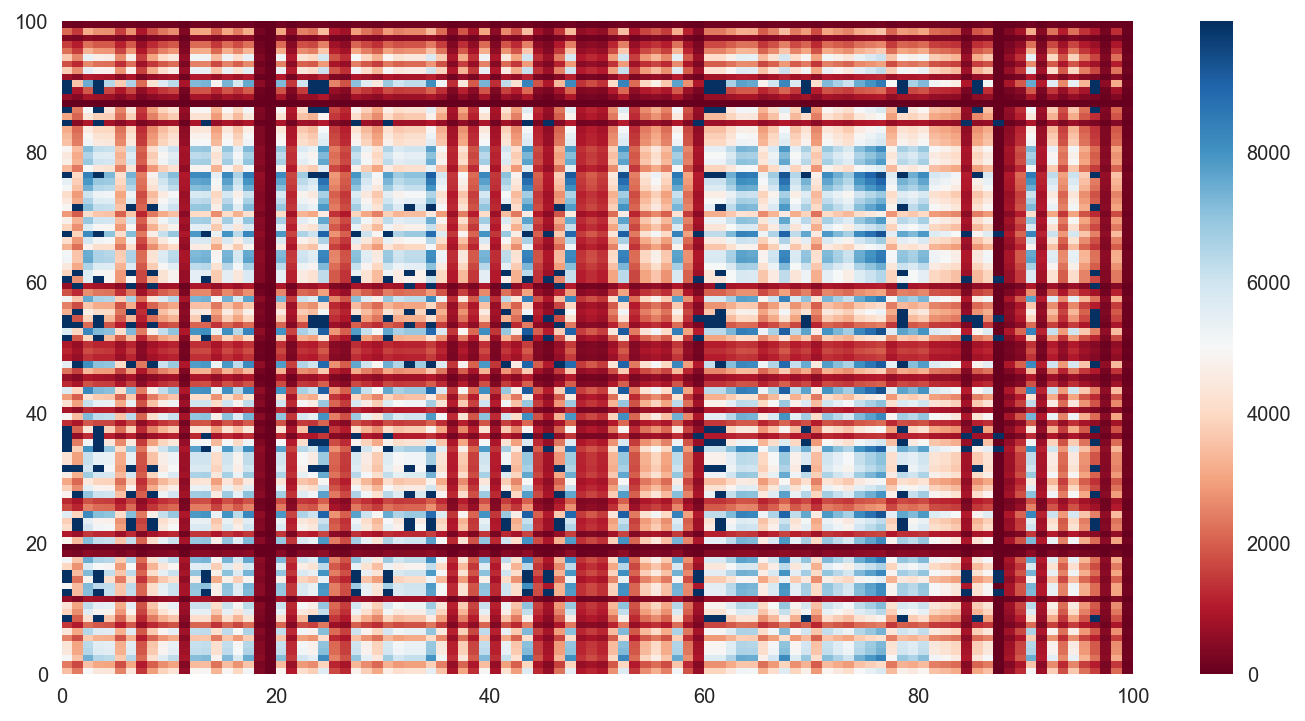

In [165]:
plt.pcolor(corrdata1,cmap='RdBu')
plt.colorbar()

#### Personal Excercise: Decompose Without Using PCA Library
First, try to visualize the data for outlier detection. This visualization doesn't really tell me anything. 
Next, I can try SVD composition that decomposes the training set matrix X into the dot product of three matrices 
$$ U E  V^T $$
where $V^T$ contains all the princpiapl components were are looking for

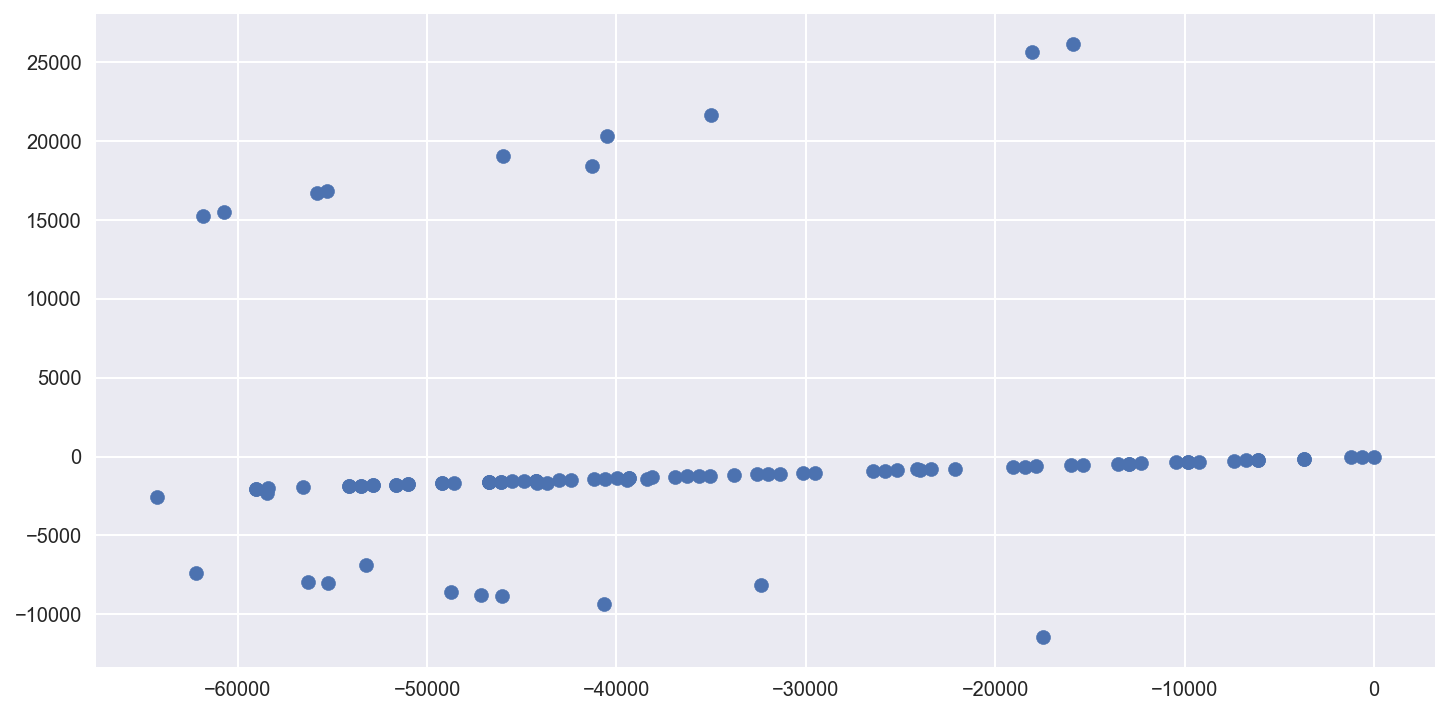

In [166]:
#recognize that the data is already centered
corrdata1_centered = corrdata1 - np.mean(corrdata1)
U, s, V = np.linalg.svd(corrdata1)
W2 = V.T[:, :2]
newdata1 = np.dot(corrdata1,V.T)
plt.scatter(newdata1[:,0],newdata1[:,1])

#### Using Sklearn PCA

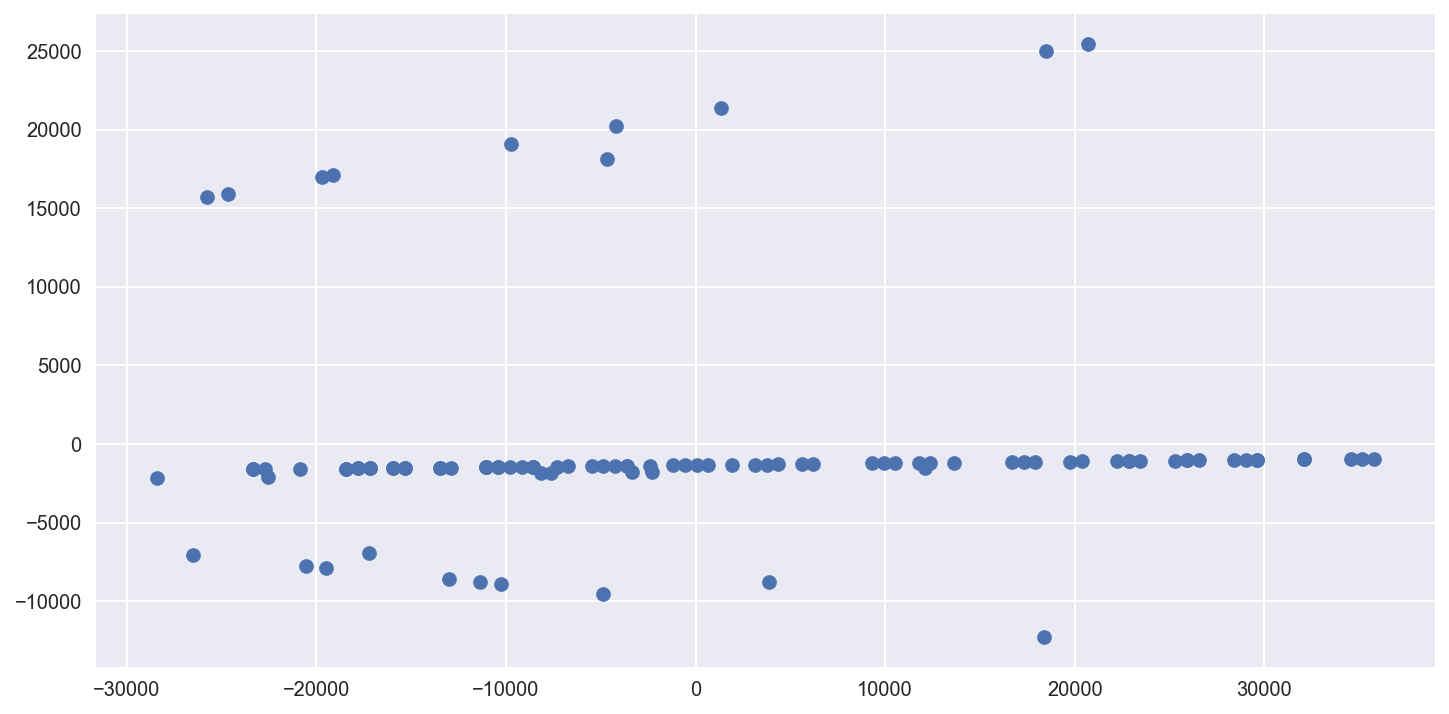

In [167]:
from sklearn.decomposition import PCA
pca = PCA( n_components = 2) 
X2D = pca.fit_transform( corrdata1)
plt.scatter(X2D[:,0],X2D[:,1])
plt.show()

We recognize that there are values not on the main blue line. Those are our corrupted data. We will find these values and bring them closer to the mean.

This is accomplished by finding the best fit line of the values that are "non corrupt"

Then map corrupt data points to that line.

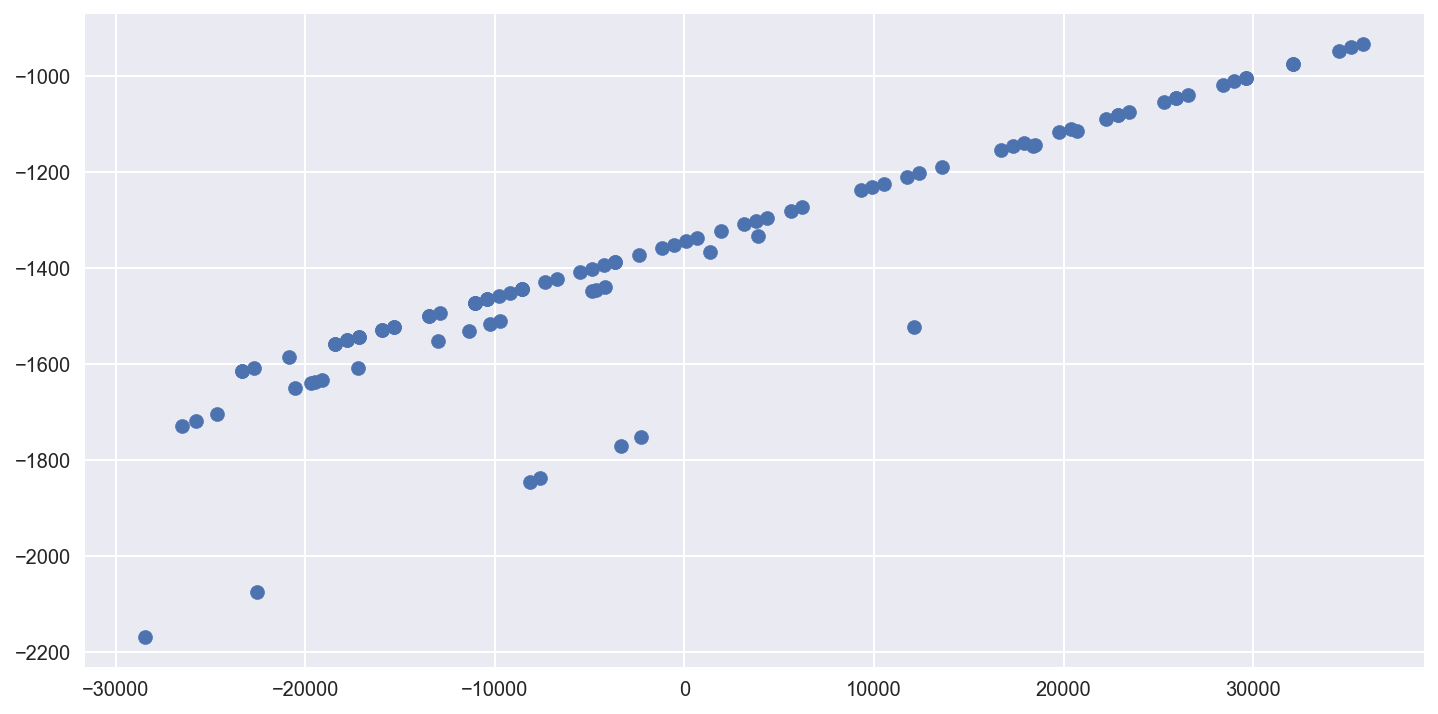

In [168]:
#Finding the best fit line of the good data set
PC1 = X2D[:,0];
PC2 = X2D[:,1];
goodX = []
goodY = []
for i in range(len(PC2)):
    if(PC2[i] > -5000 and PC2[i] < 10000):
            goodX.append(PC1[i])
            goodY.append(PC2[i])

#use best fit line for good data
fig, ax = plt.subplots()
fit = np.polyfit(goodX, goodY, 1)


#bring outliers closer to mean
newX =[]
newY = []
for i in range(len(PC2)):
    if(PC2[i] < -5000 or PC2[i] > 10000):
            newY.append(PC1[i]*fit[0] + fit[1])
    else:
            newY.append(PC2[i])

#retransformed PCA
plt.scatter(X2D[:,0],newY)
plt.show()

Here, the below data points have been normalized and are less corrupt

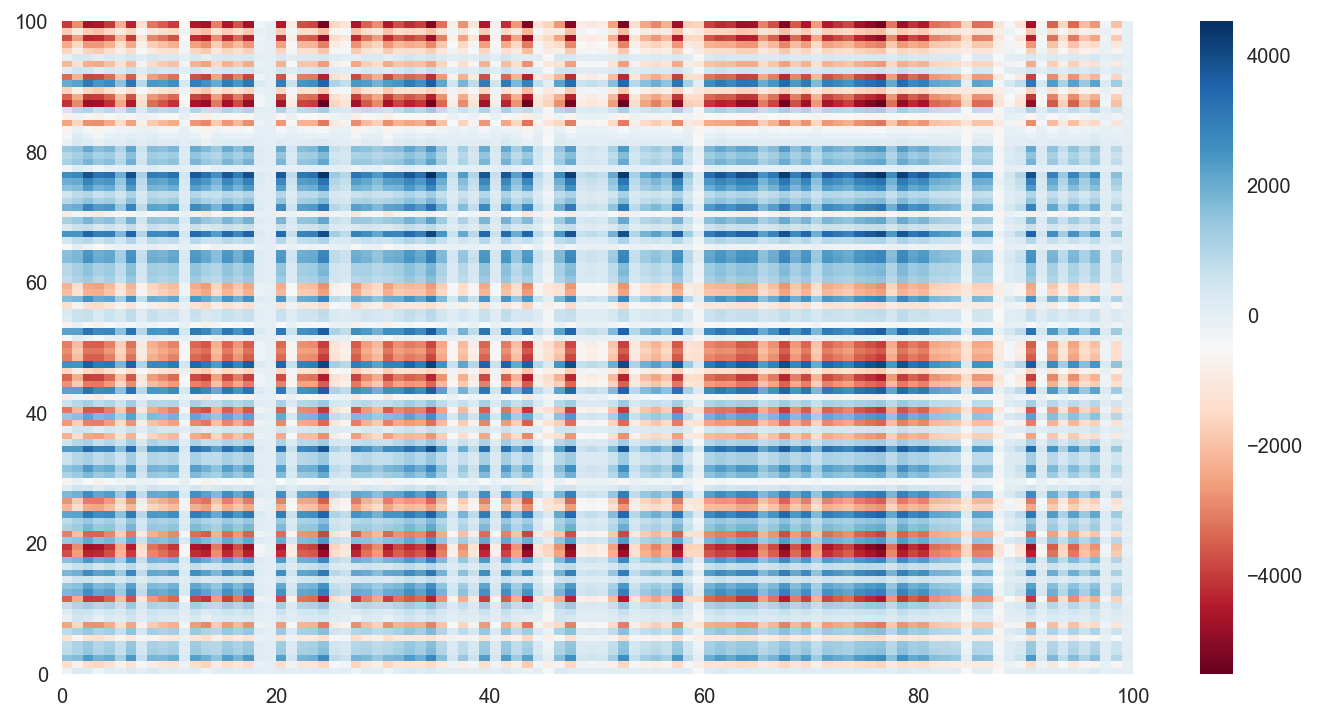

In [178]:
#retransform back to original dataset
mu = np.mean(corrdata1, axis = 0)
newX2D = np.column_stack((PC1,newY))

corrData1Xhat = np.dot(newX2D, pca.components_[:2,:])
plt.pcolor(corrData1Xhat,cmap='RdBu')
plt.colorbar()

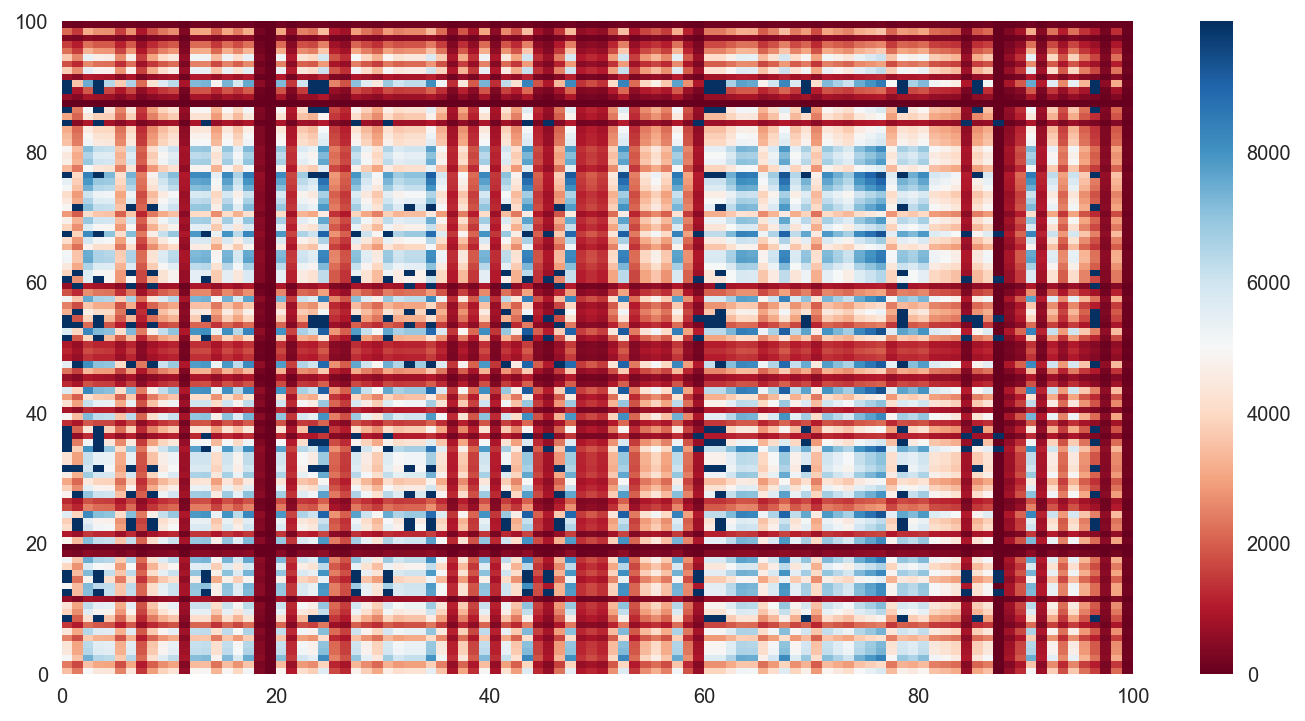

In [177]:
plt.pcolor(corrdata1,cmap='RdBu')
plt.colorbar()

We can attempt to transform our PCA back into our original data set. As we see, the gradients of values are still similiar, however, there is less noise.

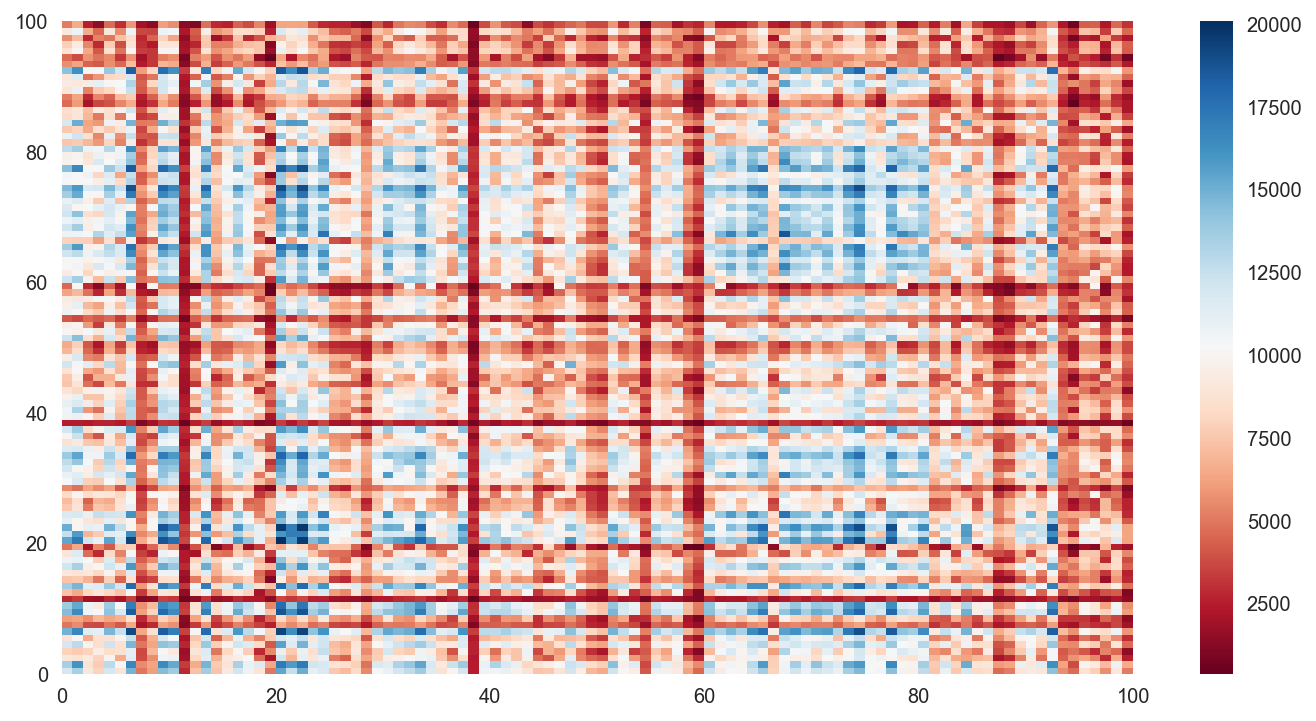

In [180]:
corrdata3 = pd.read_csv("CorrMat3.csv", header=None)
plt.pcolor(corrdata3,cmap='RdBu')
plt.colorbar()

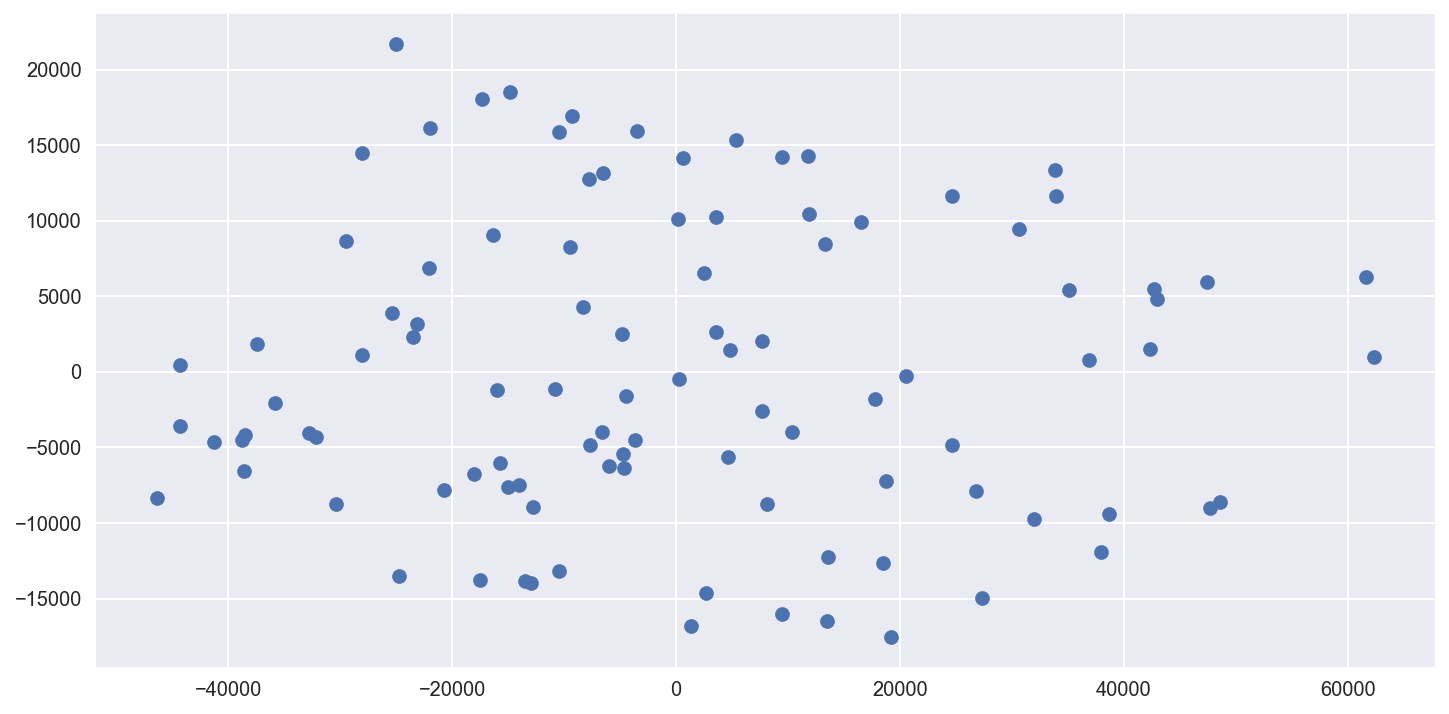

In [184]:
from sklearn.decomposition import PCA
pca = PCA( n_components = 2) 
X2D = pca.fit_transform( corrdata3)
plt.scatter(X2D[:,0],X2D[:,1])
plt.show()

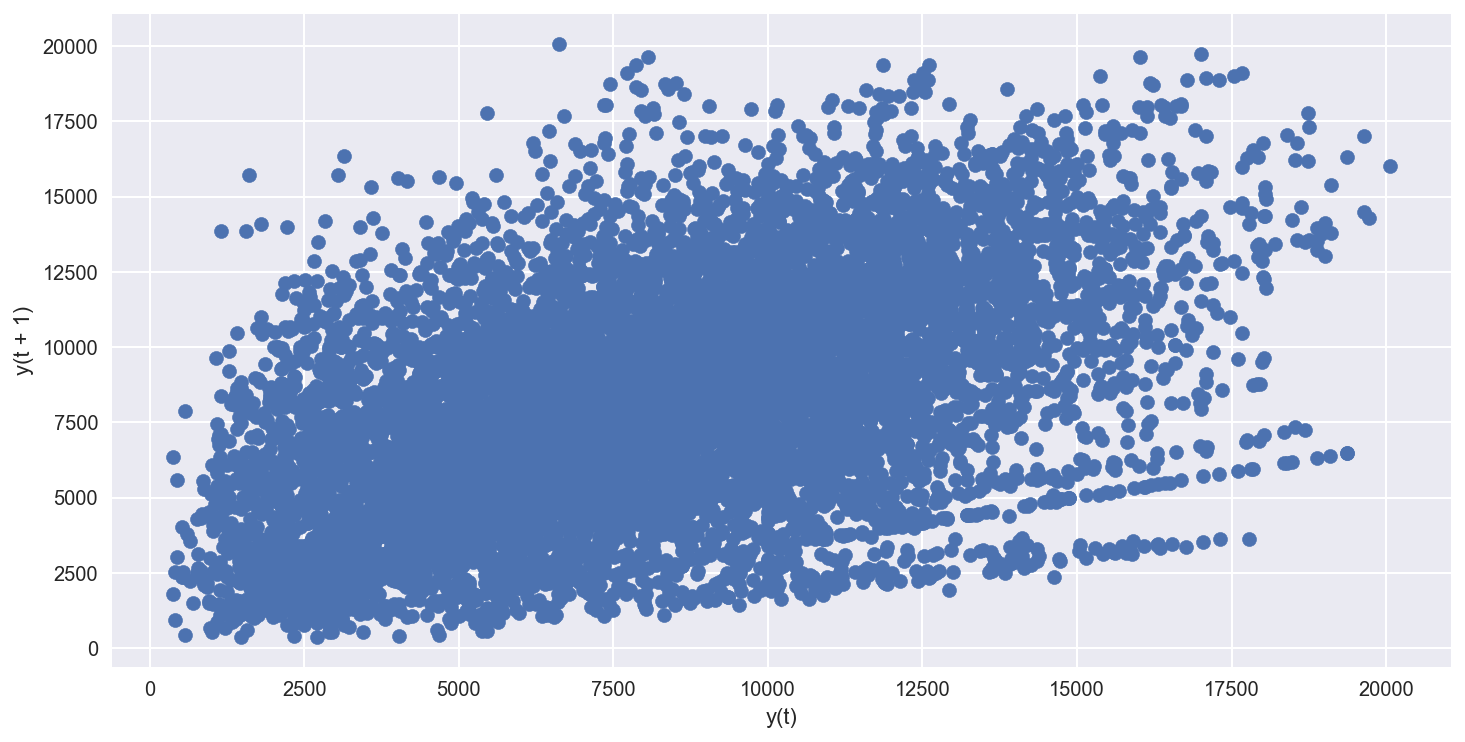

In [189]:
from pandas.plotting import lag_plot
lag_plot(corrdata3)

### So there is a trend!


In [198]:
print(corrdata3)

         0        1        2        3        4        5        6       7   \
0   11961.0  13479.0   9106.0   7953.0  11922.0   8909.0  14849.0  4983.0   
1   13479.0  16106.0   8784.0   7687.0  12888.0  10086.0  16676.0  5602.0   
2    9106.0   8784.0   9324.0   7966.0   9970.0   6540.0  11322.0  3792.0   
3    7953.0   7687.0   7966.0   9485.0   8496.0   8657.0  11211.0  3719.0   
4   11922.0  12888.0   9970.0   8496.0  12225.0   8630.0  14735.0  4944.0   
5    8909.0  10086.0   6540.0   8657.0   8630.0   9870.0  12510.0  4158.0   
6   14849.0  16676.0  11322.0  11211.0  14735.0  12510.0  19091.0  6388.0   
7    4983.0   5602.0   3792.0   3719.0   4944.0   4158.0   6388.0  2138.0   
8    6127.0   6238.0   5624.0   6927.0   6352.0   6754.0   8648.0  2870.0   
9   14455.0  16520.0  10580.0  10175.0  14200.0  11800.0  18390.0  6160.0   
10  13731.0  15284.0  10762.0   9349.0  13803.0  10166.0  17035.0  5716.0   
11   2838.0   3342.0   1928.0   1698.0   2742.0   2134.0   3520.0  1182.0   

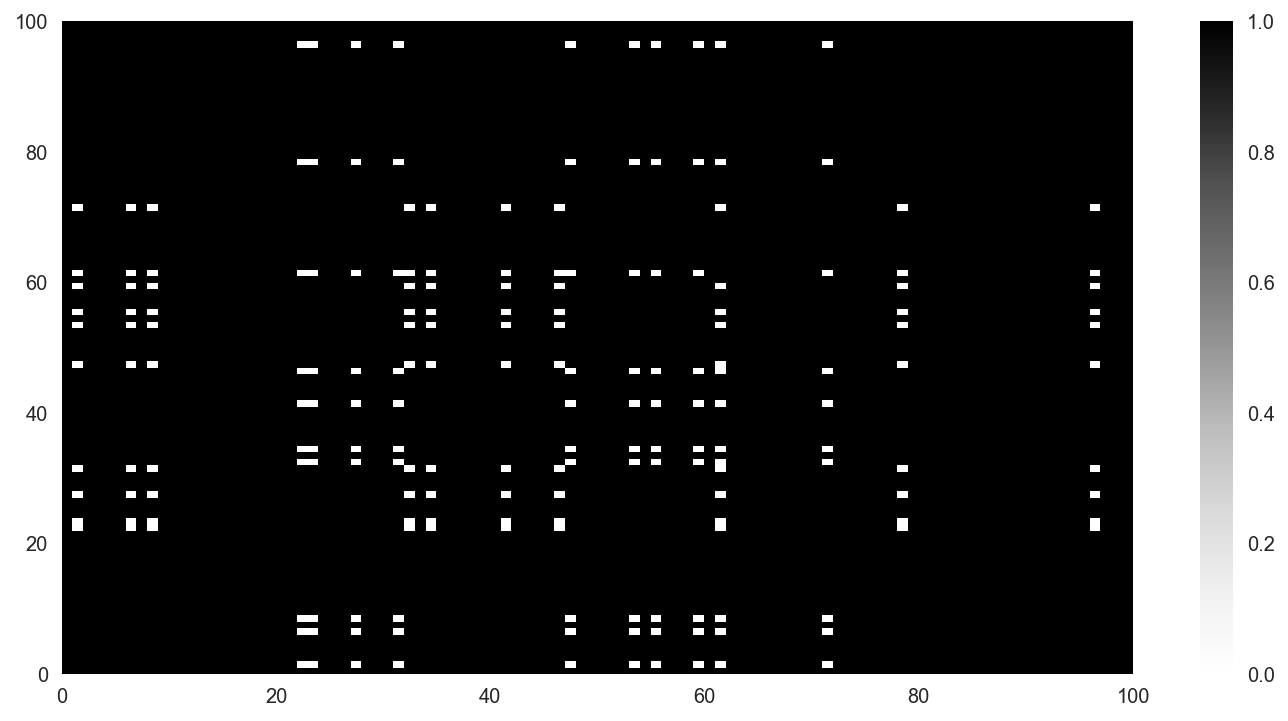

In [202]:
#visualizing data
numCols = len(corrdata3.columns)
numRows = len(corrdata3.index)
newMat = [['foo' for i in range(numCols)] for j in range(numRows)]
for i in range(numCols):
    for j in range(numRows):
        if(corrdata3[i][j] == corrdata3[j][i]):
            newMat[i][j] = 1
            newMat[j][i] = 1
        else:
            newMat[i][j] =0
            newMat[i][j] = 0
plt.pcolor(newMat)
plt.colorbar()

# Problem 3: Getting more into Kaggle.
1. Goal: Get the best score you can in the Housing prices competition. https://www.kaggle.com/c/houseprices-advanced-regression-techniques/

2. Train a ridge regression and a lasso regression model. Optimize the alphas using cross validation.
What is the best scrore you can get from a single ridge regression model and from a
single lasso model?

3. Plot the l0 norm (number of nonzeros) of the coeficients that lasso produces as you vary
alpha.

4. Add the outputs of your models as features and train a ridge regression on all the features
plus the model outputs (This is called Ensembling and Stacking). Be careful not to overfit.
What score can you get?

5. Install XGBoost (Gradient Boosting) and train a gradient boosting regression. What score
can you get just from a single XGB? (you will need to optimize over its parameters).

6. Do your best to win. Try feature engineering and stacking many models. You are allowed to
use any public tool in python. No nonpython tools allowed.

7. Read (and post) in the Kaggle forums. Include in your report if you find something in the
forums you like, or if you made a post or code, especially if other Kagglers used it afterwards.

8. Be sure you do not violate the rules of Kaggle! No sharing of code or data outside the Kaggle
forums. Every student should have their own individual Kaggle account and teams can be
formed in the Kaggle submissions with your Lab partner.

9. You will be graded based on your public score (include that in your report) and also on the
creativity of your solution. In your report (that you will submit as a pdf file), explain
what worked and what did not work. Many creative things will not work, but you will get
partial credit for developing them. We will invite teams with interesting solutions to present
them in class.

## Answers

## 3.2.
Train a ridge regression and a lasso regression model. Optimize the alphas using cross validation. What is the best scrore you can get from a single ridge regression model and from a single lasso model?

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

C:\Users\Kevin\Anaconda\lib\site-packages\matplotlib\__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

## Data preprocessing:
We're not going to do anything fancy here:
* First I'll transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal 

* Create Dummy variables for the categorical features 

* Replace the numeric missing values (NaN's) with the mean of their respective columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C5B3AC8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CA50C50>]], dtype=object)

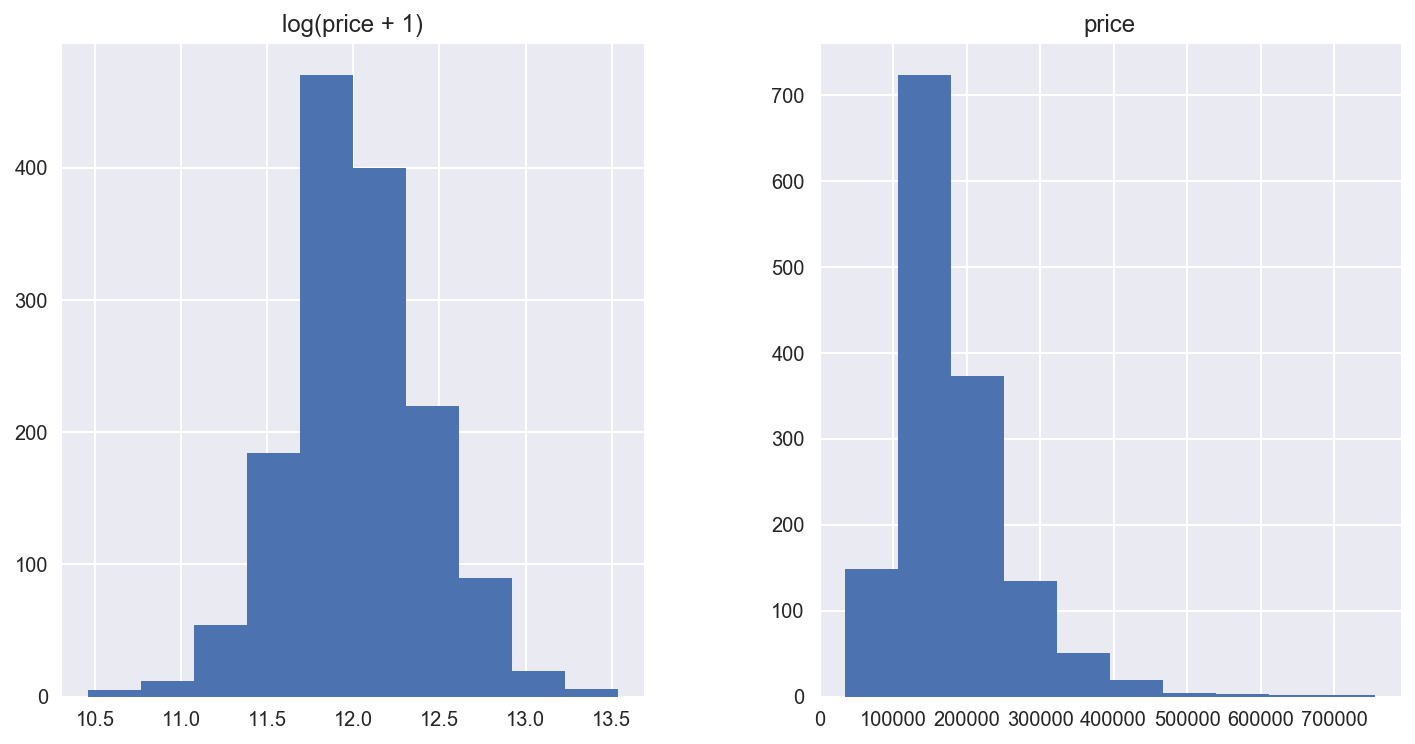

In [8]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [9]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

all_data.dtypes.head()

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

#computes skewness of data greater than 0.75
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [10]:
#assigns categorical values
all_data = pd.get_dummies(all_data)

In [11]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [12]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

## Models
Now we are going to use regularized linear regression models from the scikit learn module. I'm going to try both l_1(Lasso) and l_2(Ridge) regularization. I'll also define a function that returns the cross-validation rmse error so we can evaluate our models and pick the best tuning par

In [13]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

### Ridge

The main tuning parameter for the Ridge model is alpha - a regularization parameter that measures how flexible our model is. The higher the regularization the less prone our model will be to overfit. However it will also lose flexibility and might not capture all of the signal in the data.

In [14]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

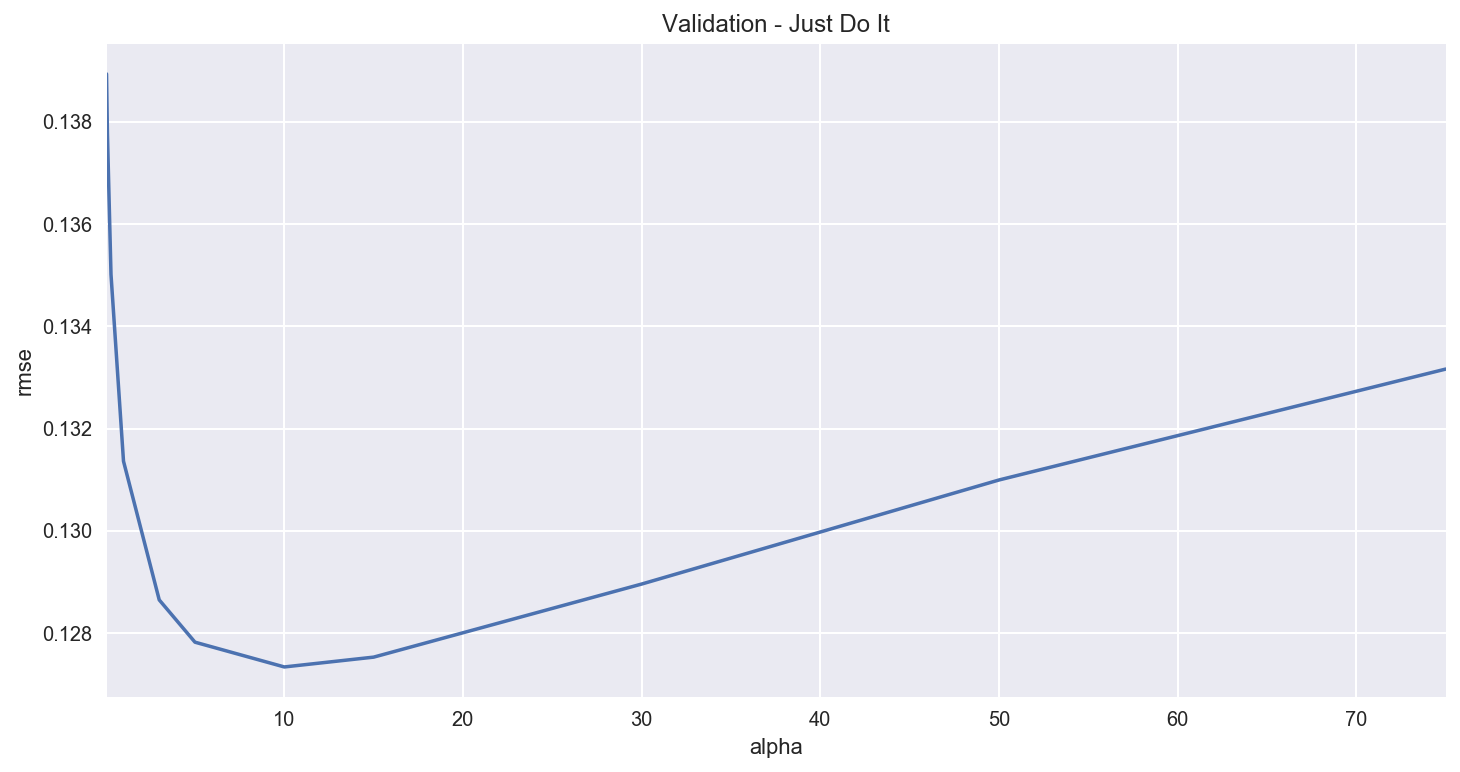

In [15]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

Note the U-ish shaped curve above. When alpha is too large the regularization is too strong and the model cannot capture all the complexities in the data. If however we let the model be too flexible (alpha small) the model begins to overfit. A value of alpha = 10 is about right based on the plot above.

In [16]:
regr_cv = RidgeCV(alphas = alphas)
model_cv = regr_cv.fit(X_train,y)
print "The best alpha for Ridge is: " + str(model_cv.alpha_)
print "The minimum RMSE for Ridge is: " + str(cv_ridge.min())

The best alpha for Ridge is: 10.0
The minimum RMSE for Ridge is: 0.127337346687


### Lasso

In [17]:
model_lasso = LassoCV()

In [18]:
alphas = [1, 0.1, 0.001, 0.0005]
model_lasso = LassoCV(alphas = alphas).fit(X_train, y)
print "The best alpha for Lasso is: " + str(model_lasso.alpha_)
print 'The minimum RMSE for Lasso is: ' + str(rmse_cv(model_lasso).mean())

The best alpha for Lasso is: 0.0005
The minimum RMSE for Lasso is: 0.12314421091


## 3.3 Plot the l0 norm (number of nonzeros) of the coeficients that lasso produces as you vary alpha.

C:\Users\Kevin\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


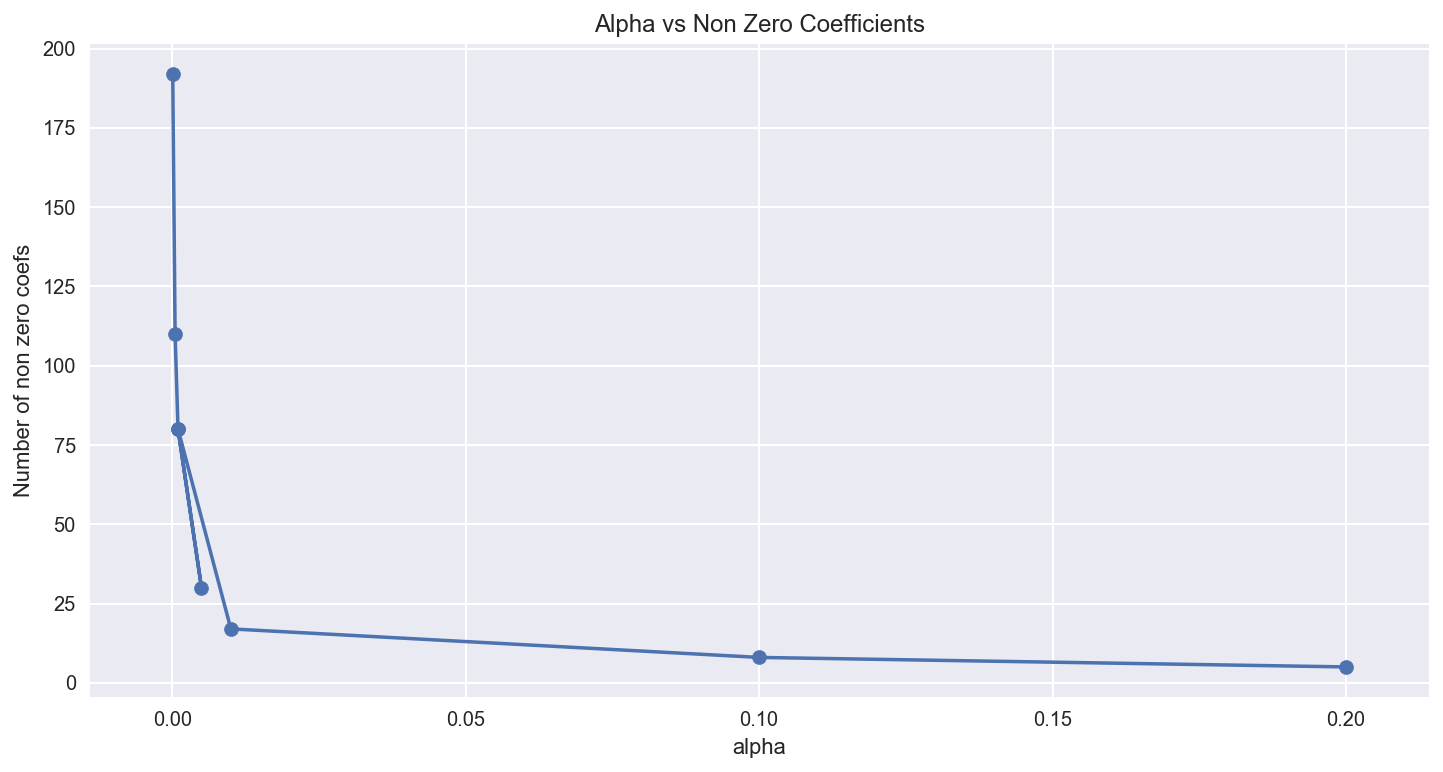

In [19]:
alphas = [0.2, 0.1, 0.01, 0.001, 0.005, 0.001, 0.0005, 0.0001]
number_nonzeros = []

for alpha in alphas:
    model_lasso = Lasso(alpha = alpha).fit(X_train,y)
    coefs = model_lasso.coef_
    count =0
    for coef in coefs:
        if coef != 0:
            count +=1
    number_nonzeros.append(count)

plt.scatter(alphas,number_nonzeros)
plt.plot(alphas, number_nonzeros)
plt.xlabel("alpha")
plt.ylabel("Number of non zero coefs")
plt.title("Alpha vs Non Zero Coefficients")
plt.show()

## 3.4 Add the outputs of your models as features and train a ridge regression on all the features plus the model outputs (This is called Ensembling and Stacking). Be careful not to overfit. What score can you get?

In [20]:
# find predictions from each model
ridge_features = model_cv.predict(X_train)
lasso_features = model_lasso.predict(X_train)

#append features
X_train['Ridge'] = ridge_features
X_train['Lasso'] = lasso_features

C:\Users\Kevin\Anaconda\lib\site-packages\IPython\kernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Kevin\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
ensemble_ridgecv = RidgeCV(alphas = alphas)
ensemble_cv = ensemble_ridgecv.fit(X_train,y)
print 'The minimum RMSE for Ensemble using Ridge is: ' + str(rmse_cv(ensemble_cv).mean())

The minimum RMSE for Ensemble using Ridge is: 0.122746545348


## 3.5 Install XGBoost (Gradient Boosting) and train a gradient boosting regression. What score can you get just from a single XGB? (you will need to optimize over its parameters).

In [22]:
import xgboost as xgb

In [28]:
#reassign X_train:


X_train = all_data[:train.shape[0]]
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

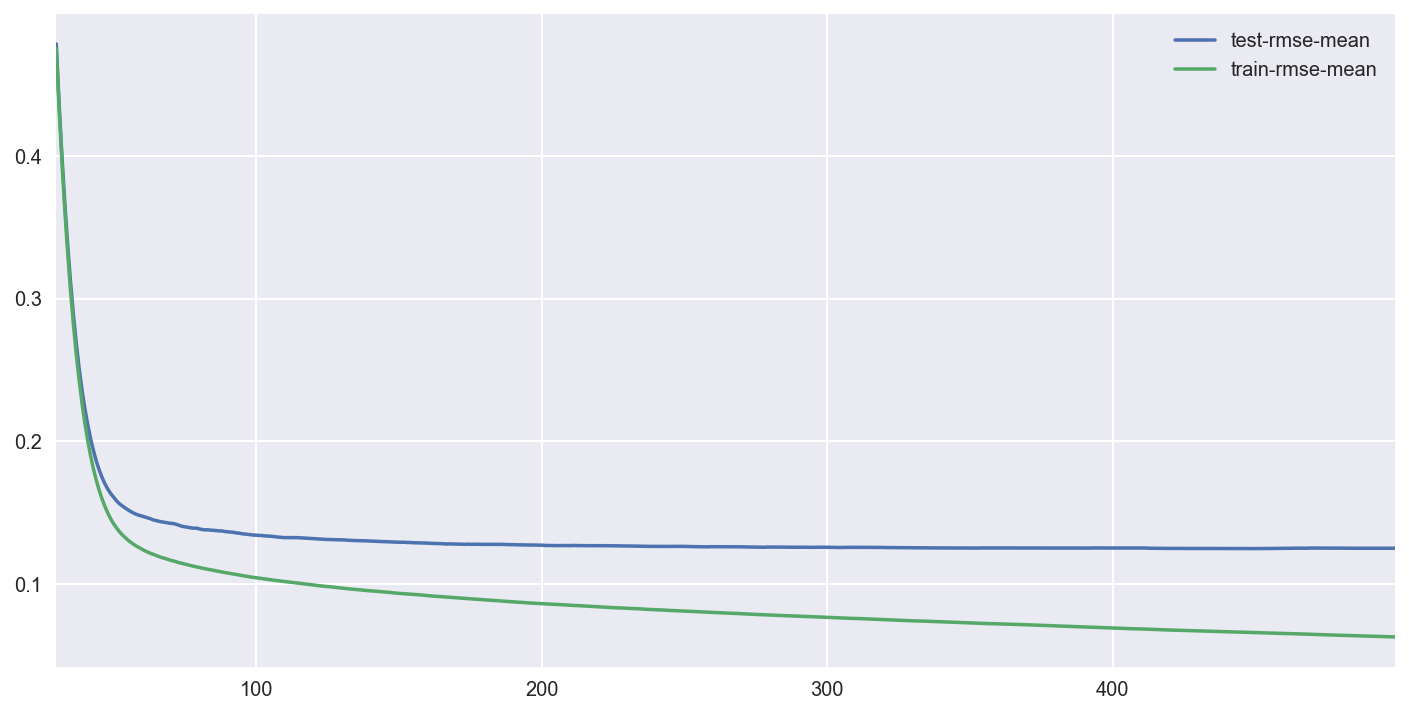

In [29]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [30]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [31]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

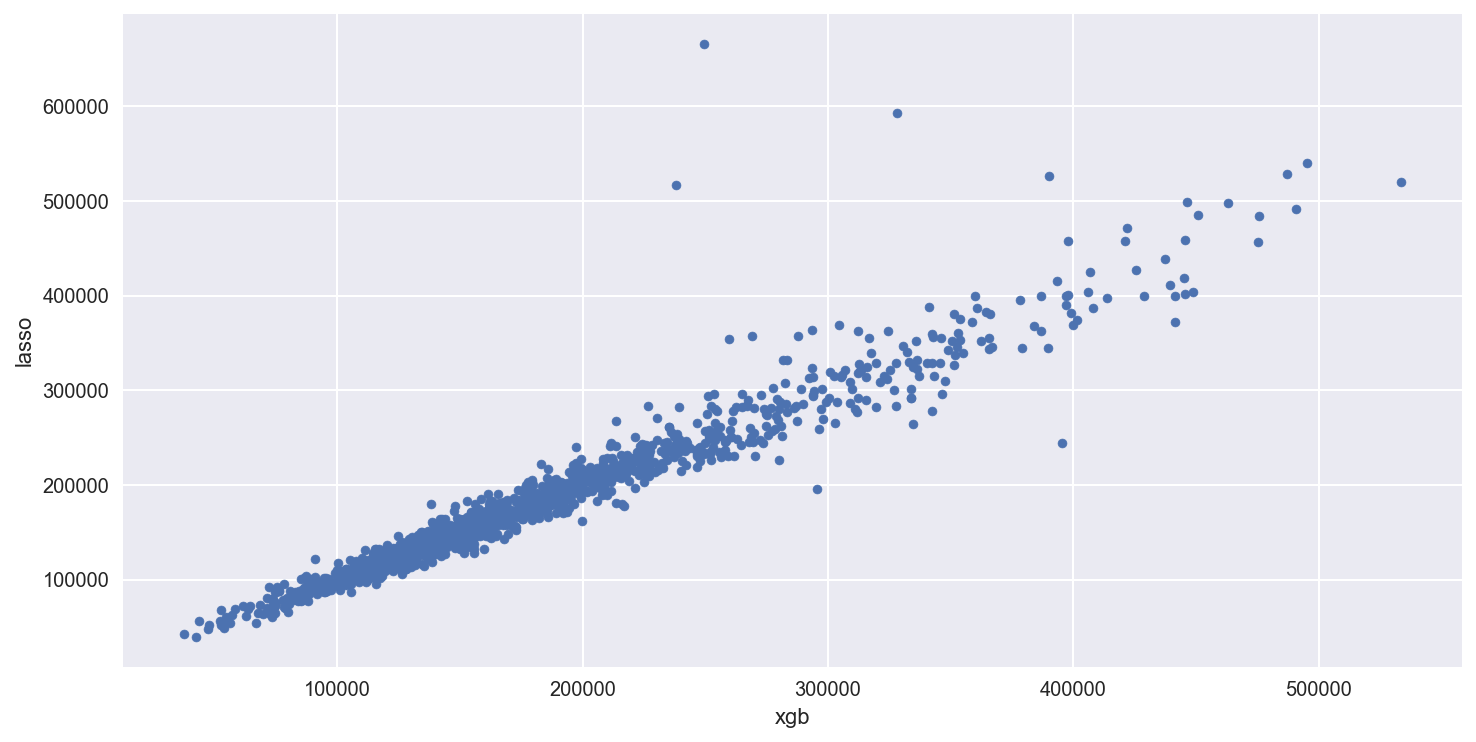

In [32]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [33]:
print 'The minimum RMSE for XGBoost is: ' + str(rmse_cv(model_xgb).mean())

The minimum RMSE for XGBoost is: 0.124944757664
